### This script contains the following points:
Note: Corresponding steps for exercise task shown as (Step x)

#### 1. (Step 1) Importing libraries and defining project path.
#### 2. (Step 2a) Bar chart of "order_day_of_week" and export
#### 3. (Step 2b) Histogram of "prices" and export
#### 4. (Step 2c) Scatterplot of "prices" and export
#### 5. (Step 2d) Line chart (using subset) of "prices" vs. "order_day_of_week" and export
#### 6. (Step 3) Bar chart of "order_hour_of_day" and export
#### 7. (Step 4) Bar chart of customer loyalty ("loyalty_flag") and export
#### 8. (Step 5) Line chart of expenditure ("prices") vs. hour of the day ("order_hour_of_day") and export
#### 9. (Step 6) Line chart of age ("age") by number of dependents ("dependants_count") and export
#### 10. (Step 7) Scatterplot of age ("age") by spending power ("income") and export

## 1. (Step 1) Importing Libraries, Defining Project Path, and Importing Datasets

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\prena\03-2023 Instacart Basket Analysis'

In [3]:
# Importing orders_products_all.pkl dataset
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
ords_prods_all.shape

(32399732, 33)

In [5]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399732 entries, 0 to 32399731
Data columns (total 33 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int32   
 1   user_id                       int32   
 2   order_number                  int8    
 3   order_day_of_week             int8    
 4   order_hour_of_day             int8    
 5   days_since_last_order         float16 
 6   product_id                    int32   
 7   add_to_cart_order             int32   
 8   reordered                     int8    
 9   _merge                        category
 10  product_name                  object  
 11  aisle_id                      int8    
 12  department_id                 int8    
 13  prices                        float16 
 14  _merge_2                      category
 15  price_range_loc               object  
 16  busiest_day                   object  
 17  busiest_days                  object  
 18  

## 2. (Step 2a) Bar Chart of "order_day_of_week"

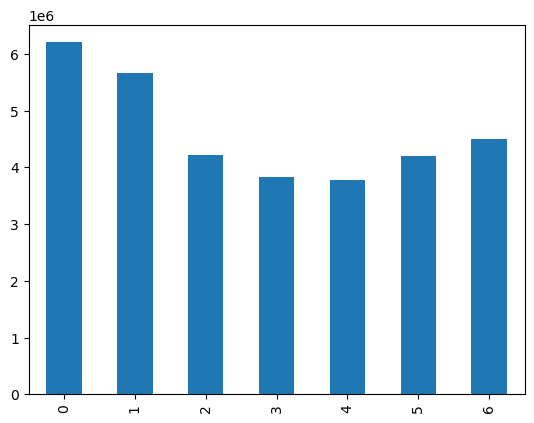

In [6]:
# Frequency of order day of the week ('order_day_of_week')
bar = ords_prods_all['order_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Export bar chart into project folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### The bar chart shows us that the busiest days of the week (the days with the most orders) are Saturday (order_day_of_week = 0) and Sunday (order_day_of_week = 6). 

## 3. (Step 2b) Histogram of "prices"

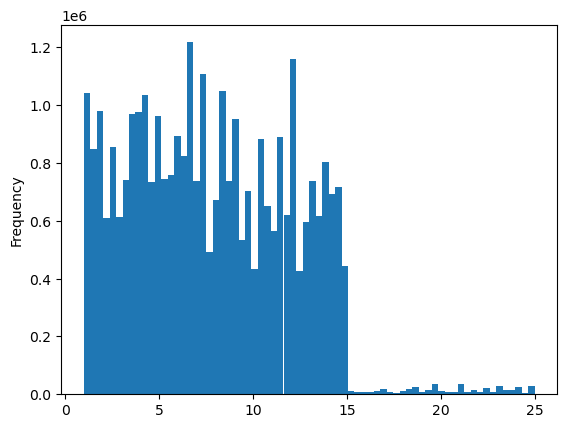

In [8]:
# Histogram showing frequency of product prices ('prices')
hist_2 = ords_prods_all['prices'].plot.hist(bins = 70)

In [9]:
# Export histogram into project folder
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [10]:
ords_prods_all['prices'].min()

1.0

In [11]:
ords_prods_all['prices'].describe()

count    3.239973e+07
mean              NaN
std      0.000000e+00
min      1.000000e+00
25%      4.199219e+00
50%      7.398438e+00
75%      1.129688e+01
max      2.500000e+01
Name: prices, dtype: float64

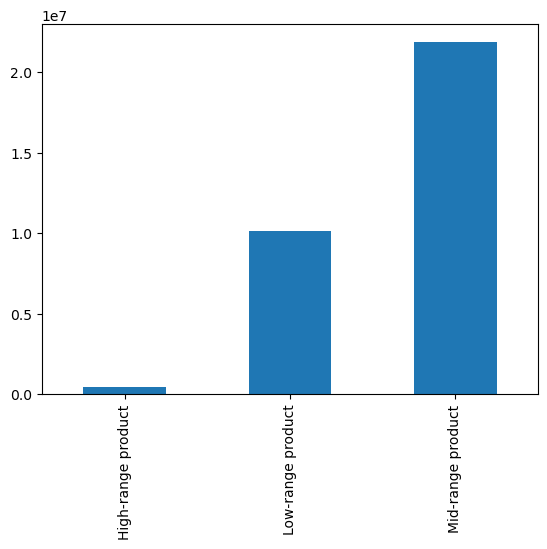

In [12]:
bar_price_range = ords_prods_all['price_range_loc'].value_counts().sort_index().plot.bar()

In [13]:
ords_prods_all['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      412551
Name: price_range_loc, dtype: int64

In [14]:
# Export bar chart into project folder
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

#### The histogram shows us that the price of most products falls between 1.00 and 15.00. There are fewer products that are priced between 15.00 and 25.00.

## 4. (Step 2c) Scatterplot of "prices"

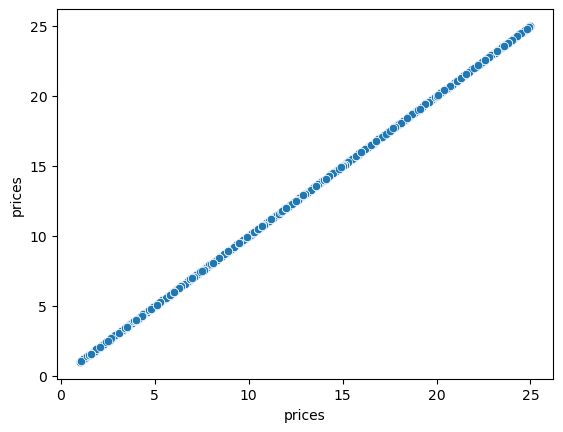

In [15]:
# Scatterplot showing prices (x: prices, y: prices)
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_all)

In [16]:
# Export histogram into project folder
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

#### The scatterplot shows us that there are no outlier prices.

## 5. (Step 2d) Line Chart (using subset) of "prices" vs. "order_day_of_week"

In [17]:
#Set the seed for the random number generator
np.random.seed(4)

In [18]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [19]:
# Store 70% of the sample in the dataframe big
big = ords_prods_all[dev]

In [20]:
# Store 30% of the sample in the dataframe small
small = ords_prods_all[~dev]

In [21]:
# Check results
len(ords_prods_all)

32399732

In [22]:
len(big) + len(small)

32399732

In [23]:
# Reduce sample to only necessary columns
df_2 = small[['order_day_of_week','prices']]

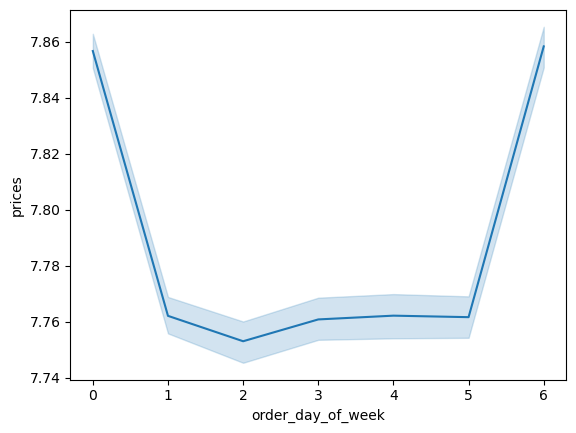

In [24]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [25]:
# Export line chart into project folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart.png'))

In [26]:
df_2.groupby('order_day_of_week')['prices'].mean()

order_day_of_week
0    7.855469
1    7.761719
2    7.753906
3    7.761719
4    7.761719
5    7.761719
6    7.859375
Name: prices, dtype: float16

#### The blue line represents how prices differ depending on the day of the week. The peaks on days zero and five mean that most money is spent on Saturday and Sunday.

## 6. (Step 3) Bar Chart of "order_hour_of_day"

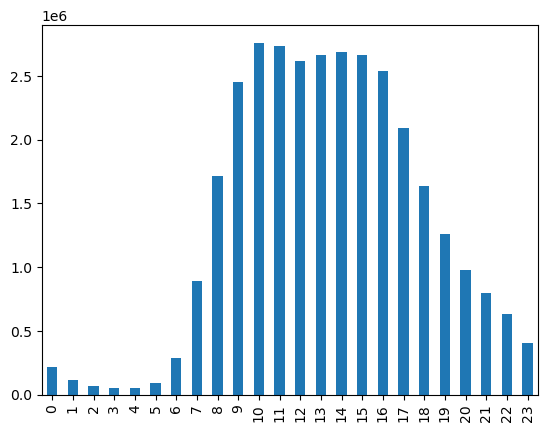

In [27]:
# Frequency of order hour of day ('order_hour_of_day')
bar_1 = ords_prods_all['order_hour_of_day'].value_counts().sort_index().plot.bar()

In [28]:
# Export bar chart into project folder
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_hour.png'))

#### The histogram shows that the least amount of orders occur between 11pm and 6am, while the most orders occur between 9am and 4pm. We previously defined our "busiest_period_of_day" as the following, and our histogram reflects this, as well:
- Most Orders: 9-16 (9am, 10am, 11am, 12pm, 1pm, 2pm, 3pm, 4pm)
- Average Orders: 7-8 (7am, 8am) and 17-22 (5pm, 6pm, 7pm, 8pm, 9pm 10pm)
- Fewest Orders: 23-6 (11pm, 12am, 1am, 2am, 3am, 4am, 5am, 6am)

## 7. (Step 4) Bar Chart of customer loyalty ("loyalty_flag")

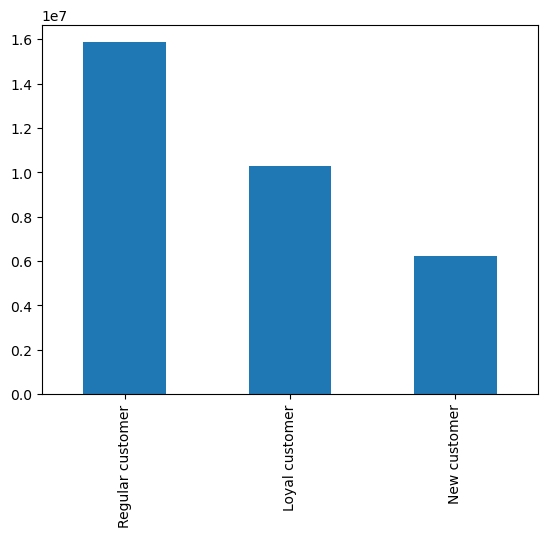

In [29]:
# Frequency of customer loyalty ('loyalty_flag')
bar_2 = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [30]:
# Frequency of customer loyalty ('loyalty_flag')
ords_prods_all['loyalty_flag'].value_counts()

Regular customer    15874128
Loyal customer      10282763
New customer         6242841
Name: loyalty_flag, dtype: int64

In [31]:
# Export bar chart into project folder
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_loyalty.png'))

#### As a reminder from the last task, customer loyalty is defined by the following criteria:
- Loyal customer = Customers with a max order of greater than 40
- Regular customer = Customers with a max order of less than or equal to 40 and greater than 10
- New customer = Customers with a max order of less than or equal to 10

#### Our bar chart shows us that regular customers have the most orders on record, followed by loyal customers in second. This tells us that there is a large pool of regular customers that have less orders/customer (between 10 and 40 orders / customer), and though loyal customers individually have more orders (> 40 / customer), there are less customers that fall into this category. 

In [32]:
ct_loyalty_day = pd.crosstab(ords_prods_all['loyalty_flag'], ords_prods_all['order_day_of_week'], dropna = False)

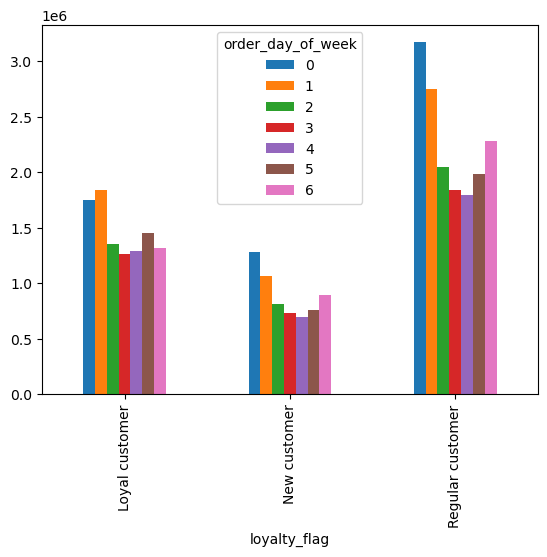

In [36]:
bar_loyal_day = ct_loyalty_day.plot.bar()

In [37]:
# Export bar chart into project folder
bar_loyal_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_day.png'))

In [38]:
ct_loyalty_hour = pd.crosstab(ords_prods_all['order_hour_of_day'], ords_prods_all['loyalty_flag'], dropna = False)

In [39]:
ct_loyalty_hour

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61741,46033,110968
1,30177,26749,58757
2,17784,15924,35652
3,13373,11993,25902
4,16877,10918,25437
5,29345,16013,42586
6,112845,43374,134231
7,346651,129987,414285
8,643813,267083,806967


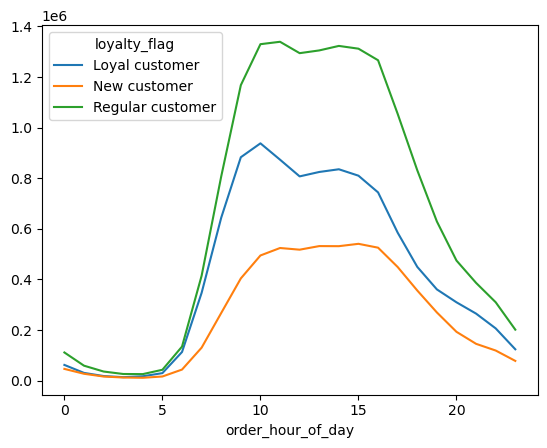

In [40]:
line_loyalty_hour = ct_loyalty_hour.plot.line()

In [41]:
# Export bar chart into project folder
line_loyalty_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_loyalty_hour.png'))

## Bar Chart of order frequency ("order_freq_flag")

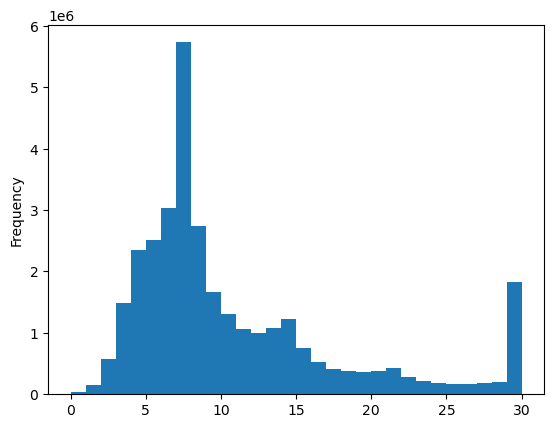

In [42]:
# Histogram showing frequency of product prices ('median_days_since_last_order')
hist_med_last = ords_prods_all['median_days_since_last_order'].plot.hist(bins = 30)

In [43]:
# Export bar chart into project folder
hist_med_last.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_med_last.png'))

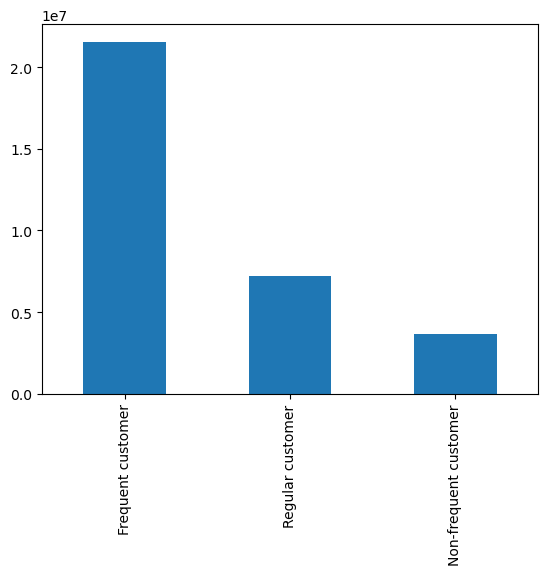

In [44]:
# Frequency of customer loyalty ('loyalty_flag')
bar_ord_freq = ords_prods_all['order_freq_flag'].value_counts().plot.bar()

In [45]:
# Export bar chart into project folder
bar_ord_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ord_freq.png'))

In [46]:
# Frequency of customer loyalty ('loyalty_flag')
ords_prods_all['order_freq_flag'].value_counts()

Frequent customer        21556644
Regular customer          7207340
Non-frequent customer     3635743
Name: order_freq_flag, dtype: int64

## 8. (Step 5) Line Chart of expenditure ("prices") vs. hour of the day ("order_hour_of_day")

In [47]:
# Reduce sample to only necessary columns
df_3 = small[['order_hour_of_day','prices']]

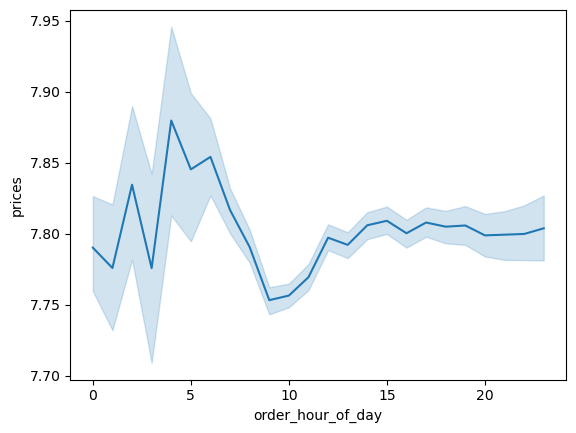

In [48]:
# Create line chart
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

#### The blue line represents how prices differ depending on the hour of the day. The peaks on hour 4 and 6 mean that most money is spent in the morning.

In [49]:
# Export line chart into project folder
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour.png'))

In [50]:
df_3.groupby('order_hour_of_day').agg({'prices': ['mean']})

,prices
,mean
order_hour_of_day,
0,7.789062
1,7.777344
2,7.835938
3,7.777344
4,7.878906
5,7.843750
6,7.855469
7,7.816406


#### Taking a look at the number of orders by department at the 4am hour:

In [51]:
df_hour_4 = small[small['order_hour_of_day']==4]

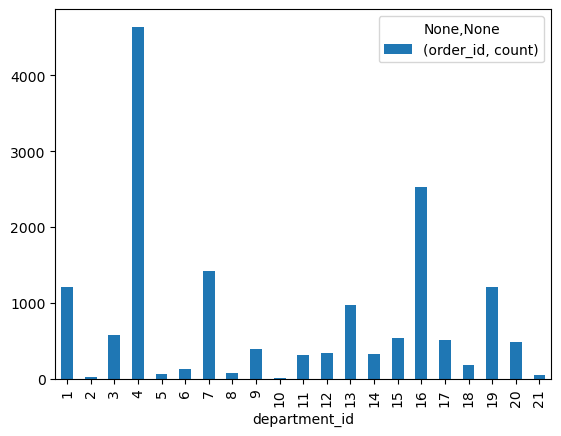

In [52]:
bar_hour_4_dept = df_hour_4.groupby('department_id').agg({'order_id': ['count']}).plot.bar()

In [53]:
# Export bar chart into project folder
bar_hour_4_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_4_dept.png'))

#### Taking a look at the number of orders by department at the 6am hour:

In [54]:
df_hour_6 = small[small['order_hour_of_day']==6]

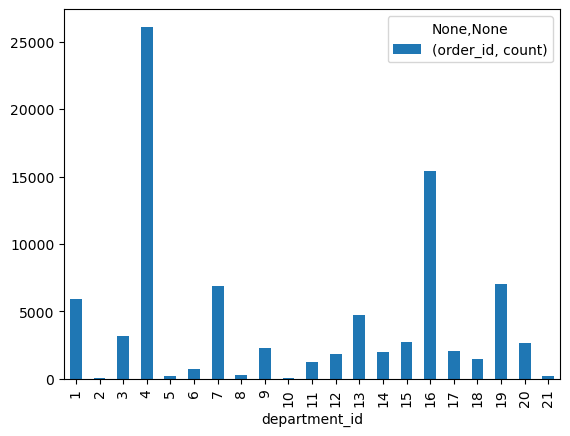

In [55]:
bar_hour_6_dept = df_hour_6.groupby('department_id').agg({'order_id': ['count']}).plot.bar()

In [56]:
# Export bar chart into project folder
bar_hour_6_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_6_dept.png'))

## 9. (Step 6) Line chart of age ("age") by number of dependents ("dependants_count")

In [57]:
# Reduce sample to only necessary columns
df_4 = small[['age','dependants_count','fam_status']]

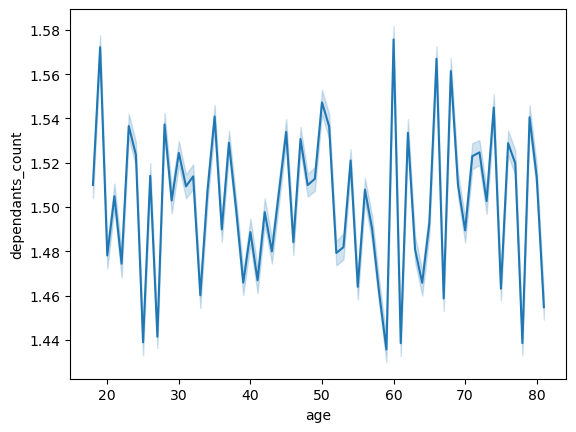

In [58]:
# Create line chart
line_3 = sns.lineplot(data = df_4, x = 'age',y = 'dependants_count')

In [59]:
# Export line chart into project folder
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_age.png'))

#### The blue line is showing the number of dependants by age of our customers. The line seems to be random, so we can infer that there's not a connection between age and family situation.

## 10. (Step 7) Scatterplot of age ("age") by spending power ("income")

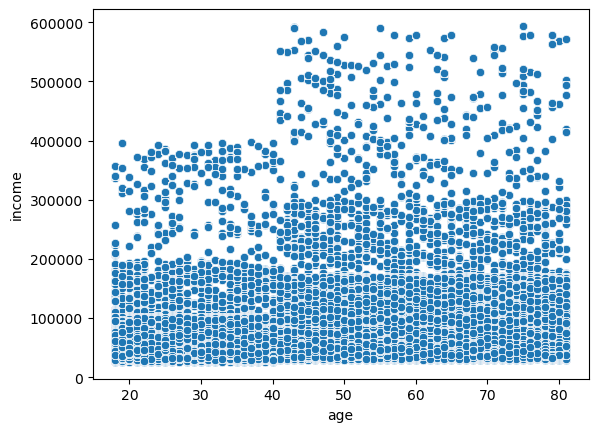

In [60]:
# Scatterplot showing age (x) vs. income (y)
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_all)

In [61]:
# Export scatterplot into project folder
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

#### The scatterplot shows us each customer age vs. the income each customer earns. 
- From ages 20-40, most customers make between 25,903 (min value) and ~200,000, while there are a few customers in this age range that make up to ~400,000. 
- From ages 40 - 80, most customers make between 25,903 (min value) and ~300,000, while there are a few customers in this age range that make up to ~600,000.

#### This tells us that spending power increases around the age of 40.

In [62]:
ords_prods_all['income'].min()

25903

Just a quick check, I wanted to look at the frequency of income to see if it makes since given what we see with the scatterplot (it does!):

In [63]:
# Reduce sample to only necessary columns
df_5 = big[['income']]

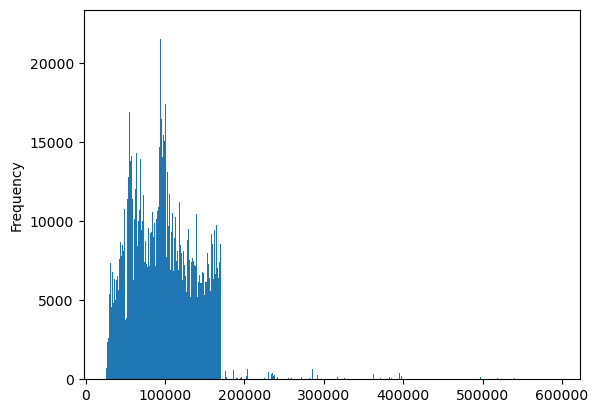

In [64]:
# Frequency of income ('income')
hist_x = df_5['income'].plot.hist(bins = 10000)

In [65]:
# Export histogram into project folder
hist_x.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_inc_freq.png'))